# VECM

by **Professor Throckmorton**  
for *Time Series Econometrics*  
W&amp;M ECON 408/PUBP 616  
<a href="vecm.slides.html">Slides</a>

## Summary

- **Vector Error Correction Model** (VECM) is specifically used for analyzing cointegrated time series that are first-order integrated, I($1$).
- VECM is builds on the concept of **cointegration**, i.e., each time series might be I($1$), and certain linear combinations of them are stationary, I($0$).
- VECM is derived from a reduced-form VAR in levels when the data is cointegrated
- VECM includes an **error correction term** that reflects the deviation from the lagged long-run average or "equilibrium"

## VECM

- Suppose $\mathbf{y}_t$ is a VAR($p$) with I($1$), possibly cointegrated, variables in levels, then

  \begin{gather*}
    \Delta \mathbf{y}_t = \boldsymbol{\Pi} \mathbf{y}_{t-1} + \sum_{h=1}^{p-1} \boldsymbol{\Gamma}_h \Delta \mathbf{y}_{t-h} + \boldsymbol{\upsilon}_t
  \end{gather*}

- $\Delta \mathbf{y}_t$ is the **first difference** of a vector of $n$ non-stationary, I($1$), variables, making them stationary. $\sum_{h=1}^{p-1} \boldsymbol{\Gamma}_h \Delta \mathbf{y}_{t-h}$ captures the **short-run dynamics** of the system, and $\boldsymbol{\upsilon}_t$ is a vector of white noise errors.
- $\boldsymbol{\Pi} \mathbf{y}_{t-1}$ is the **error correction term**, i.e., the long-run equilibrium relationship between variables in levels, where $\boldsymbol{\Pi}$ is the cointegration structure.
  - If $\boldsymbol{\Pi} = \boldsymbol{0}$, there is no cointegration and no need for VECM.
  - If $\boldsymbol{\Pi}$ has reduced rank, $r < n$, then $\boldsymbol{\Pi} = \boldsymbol{\alpha} \boldsymbol{\beta}'$, where:
    - $\boldsymbol{\beta}_{n \times r}$ is a matrix of **cointegrating vectors**.
    - $\boldsymbol{\alpha}_{n \times r}$ is a matrix of **adjustment coefficients**, determining how each variable returns to its long-run equilibrium.
  - If $\boldsymbol{\Pi}$ is full rank, $r = n$, then $\mathbf{y}_t$ is already stationary and no need for VECM.

## Rank of a matrix

- A square matrix $\mathbf{A}_{n \times n}$ is **full rank** if its rank is $n$. It's not full rank, or has reduced rank, if its rank $<n$.
- The following conditions are all equivalent — if any one is true, the matrix is full rank (*warning*: this is not a complete list)
    1. **Linearly independent columns**: No column can be written as a linear combination of the others.
    2. **Linearly independent rows**: No row is a linear combination of other rows.
    3. **Non-zero determinant**: $\det(\mathbf{A}) \ne 0$ or $|\mathbf{A}| \ne 0$
    4. **Invertibility**: there exists $\mathbf{A}^{-1}$ such that $\mathbf{A} \mathbf{A}^{-1} = I_n$

### Examples

- Consider the following square matrix

  \begin{gather*}
  \mathbf{A} = \begin{bmatrix}
  2 & 4 \\
  1 & 2
  \end{bmatrix}
  \end{gather*}

  - Column 2 is $2\times$ column 1 $\rightarrow$ $\mathbf{A}$ is not full rank
  - Row 1 is $2\times$ row 2 $\rightarrow$ $\mathbf{A}$ is not full rank

- Consider the following square matrix

  \begin{gather*}
  \mathbf{A} = \begin{bmatrix}
  3 & 5 \\
  2 & 4
  \end{bmatrix}
  \end{gather*}

  - We can't multiply one row or column by a constant to get the other.  
  - The determinant of a $2 \times 2$ matrix is $|\mathbf{A}| = ad - bc$
  - Plug in the values $|\mathbf{A}| = (3)(4) - (5)(2) = 12 - 10 = 2$
  - Since $|\mathbf{A}| \neq 0$, the matrix is full rank.

In [1]:
# Scientific computing
import numpy as np
# Matrix
A = np.array([
    [1, 2], 
    [2, 4]
])
# Rank
rank = np.linalg.matrix_rank(A)
# Determinant
det = np.linalg.det(A)
# Display
print(f'det = {det:.4f}')
print(rank)

det = 0.0000
1


In [2]:
# Matrix
A = np.array([
    [3, 5], 
    [2, 4]
])
# Rank
rank = np.linalg.matrix_rank(A)
# Determinant
det = np.linalg.det(A)
# Display
print(f'det = {det:.4f}')
print(rank)

det = 2.0000
2


- For a $3 \times 3$ square matrix

  \begin{gather*}
    \mathbf{A} = \begin{bmatrix}
    a & b & c \\
    d & e & f \\
    g & h & i
    \end{bmatrix}
  \end{gather*}

- The determinant formula is $a(ei - fh) - b(di - fg) + c(dh - eg)$.
- That is the sum of the three determinants for $2 \times 2$ matrices.
- See [https://en.wikipedia.org/wiki/Determinant](https://en.wikipedia.org/wiki/Determinant).

## Cointegration

- If some linear combination of non-stationary I($1$) time series is **stationary**, then the variables are **cointegrated**, i.e., they share a **stable long-run linear relationship** despite short-run fluctuations.
- Suppose we want to test for how many cointegrating relationships, $r$, exist among $n$, I($1$), time series.
- For example, if $r = 0$, then there are no cointegrating relationships, and if $r=n-1$ then all variables are cointegrated with eachother.
- To justify estimating a VECM, there should be at least one cointegrating relationship between the variables, otherwise just esimate a VAR after first differencing.

### Johansen Cointegration Test
  
- First, use the ADF (unit root) test to confirm that all time series are I($1$).
- The **Johansen Cointegration Test** has nested hypotheses
  - Suppose there are $r_0 = 0$ cointegrating relationships
    - **Null Hypothesis**: $H_0: r \leq r_0$ (i.e., the number of cointegrating relationships $\leq r_0$)
    - **Alternative Hypothesis**: $H_A: r > r_0$
  - For each null hypothesis $H_0: r \leq r_0$, if the test statistic $>$ critical value $\Rightarrow$ reject $H_0$.
  - Then update $r_0 = 1,2,3,\ldots$ until test **fails to reject**
- In practice, use `coint_johansen()` function from `statsmodels.tsa.vector_ar.vecm`.
   - Choose lag length ($p-1$) for the VAR in differences.
   - Decide on deterministic components (constant/time trend) in the test.
- Proceed to estimate a VECM if cointegration is found.

## Example

- The U.S. macroeconomy has gone through many important generational changes that might affect the cointegrating relationships between aggregate time series variables
- E.g, The Great Depression, Post-War Period, Great Inflation of the late 1960s to early 1980s, The Great Moderation, The Great Recession (and the slow recovery), Post COVID
- Let's test whether consumption and income are cointegrated for the 25 years prior to the Great Moderation (1960-1984)
- Measure them with log real PCE and log real GDP

### Read Data

In [3]:
# Libraries
from fredapi import Fred
import pandas as pd
# Setup acccess to FRED
fred_api_key = pd.read_csv('fred_api_key.txt', header=None).iloc[0,0]
fred = Fred(api_key=fred_api_key)
# Series to get
series = ['GDP','PCE','GDPDEF']
rename = ['gdp','cons','price']
# Get and append data to list
dl = []
for idx, string in enumerate(series):
    var = fred.get_series(string).to_frame(name=rename[idx])
    dl.append(var)
    print(var.head(2)); print(var.tail(2))

            gdp
1946-01-01  NaN
1946-04-01  NaN
                  gdp
2025-01-01  29962.047
2025-04-01  30331.117
             cons
1959-01-01  306.1
1959-02-01  309.6
               cons
2025-05-01  20615.2
2025-06-01  20685.2
             price
1947-01-01  11.141
1947-04-01  11.299
              price
2025-01-01  127.429
2025-04-01  128.059


### Create Dataframe

In [4]:
# Concatenate data to create data frame (time-series table)
raw = pd.concat(dl, axis=1).sort_index()
# Resample/reindex to quarterly frequency
raw = raw.resample('QE').last()
# Display dataframe
display(raw.head(2))
display(raw.tail(2))

gdp  cons  price
1946-03-31  NaN   NaN    NaN
1946-06-30  NaN   NaN    NaN

gdp     cons    price
2025-03-31  29962.047  20578.5  127.429
2025-06-30  30331.117  20685.2  128.059

### Transform Data

In [5]:
data = pd.DataFrame()
# log real GDP
data['logGDP'] = 100*(np.log(raw['gdp']/raw['price']))
data['dlogGDP'] = data['logGDP'].diff(1)
# log real Consumption
data['logCons'] = 100*(np.log(raw['cons']/raw['price']))
data['dlogCons'] = data['logCons'].diff(1)
# Select sample
sample = data['01-01-1960':'12-31-1984']
display(sample.head(2))
display(sample.tail(2))

logGDP   dlogGDP     logCons  dlogCons
1960-03-31  356.027682  2.226717  306.351449  1.839417
1960-06-30  355.485842 -0.541840  306.068692 -0.282757

logGDP   dlogGDP     logCons  dlogCons
1984-09-30  441.310256  0.959766  393.568460  0.634225
1984-12-31  442.127526  0.817270  394.731279  1.162819

### Plot Sample

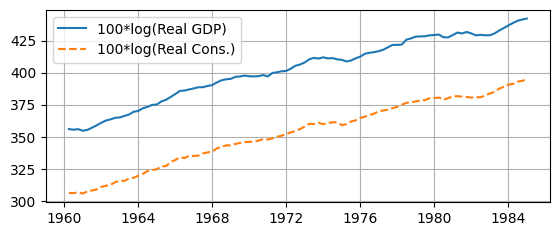

In [6]:
# Data in levels
sample_lev = sample[['logGDP','logCons']]
# Plot data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6.5,2.5))
ax.plot(sample_lev['logGDP'], 
        label='100*log(Real GDP)', linestyle='-')
ax.plot(sample_lev['logCons'], 
        label='100*log(Real Cons.)', linestyle='--')
ax.grid(); ax.legend(loc='upper left');

### ADF Unit Root Test

In [7]:
from statsmodels.tsa.stattools import adfuller
# Function to organize ADF test results
def adf_test(data,const_trend):
    keys = ['Test Statistic','p-value','# of Lags','# of Obs']
    values = adfuller(data,regression=const_trend)
    test = pd.DataFrame.from_dict(dict(zip(keys,values[0:4])),
                                  orient='index',columns=[data.name])
    return test

In [8]:
dl = []
for column in sample.columns:
    test = adf_test(sample[column],const_trend='c')
    dl.append(test)
results = pd.concat(dl, axis=1)
display(results)

logGDP    dlogGDP    logCons   dlogCons
Test Statistic  -1.341693  -4.949552  -1.158324  -5.421674
p-value          0.609889   0.000028   0.691262   0.000003
# of Lags        2.000000   1.000000   2.000000   1.000000
# of Obs        97.000000  98.000000  97.000000  98.000000

- Note: the argument `const_trend` sets whether the test accounts for a constant, `'c'`, and time trend, `'ct'`.
- Fail to reject null for both time series in levels
- Reject the null for both first-differenced time series
- Since they are both $I(1)$, proceed to Johansen Cointegration Test

### Trends

- **Stochastic trend**, i.e., $y_t = \mu + y_{t-1} + \varepsilon_t$
   - Can drift without bound — **non-stationary**
- **Deterministic trend**, i.e., $y_t = \mu + \delta t + \varepsilon_t$
   - Deviations from the time trend are **mean-reverting**
- Both deterministic and stochastic trends, i.e., $y_t = \mu + \delta t + y_{t-1} + \varepsilon_t$
- First differencing will remove either trend.

In [9]:
# Test data for deterministic time trend
dl = []
for column in sample_lev.columns:
    test = adf_test(sample_lev[column],'ct')
    dl.append(test)
results = pd.concat(dl, axis=1)
display(results)

logGDP    logCons
Test Statistic  -2.482304  -2.202394
p-value          0.336865   0.488503
# of Lags        2.000000   2.000000
# of Obs        97.000000  97.000000

- In `adfuller`, setting `regression = 'ct'` allows for both a constant and linear time trend.
- Fail to reject the null that the data (after removing linear trend) has a unit root, i.e., **removing the linear trend did not make the data stationary.**
- The data is probably stationary around a **stochastic trend**.
- Regardless, first differencing the data for the VECM will remove these trends, so we don't need to account for them later.

### Cointegration Test

In [10]:
# Johansen Cointegration Test
from statsmodels.tsa.vector_ar.vecm import coint_johansen
test = coint_johansen(sample_lev, det_order=-1, k_ar_diff=1)
test_stats = test.lr1; crit_vals = test.cvt[:, 1]
# Print results
for r_0, (test_stat, crit_val) in enumerate(zip(test_stats, crit_vals)):
    print(f'H_0: r <= {r_0}')
    print(f'  Test Stat. = {test_stat:.2f}, 5% Crit. Value = {crit_val:.2f}')
    if test_stat > crit_val:
        print('  => Reject null hypothesis.')
    else:
        print('  => Fail to reject null hypothesis.')

H_0: r <= 0
  Test Stat. = 34.30, 5% Crit. Value = 12.32
  => Reject null hypothesis.
H_0: r <= 1
  Test Stat. = 0.03, 5% Crit. Value = 4.13
  => Fail to reject null hypothesis.


- There is evidence that GDP and consumption are cointegrated.
- `det_order = -1` omits a common constant or linear time trend from the cointegrating relationship. 
- `k_ar_diff = 1` means we are using a VECM with 1 lag of differences.

### Estimation

- There is evidence that both GDP and consumption are I($1$) and they are cointegrated.
- If the data wasn't cointegrated, they should be first differenced and estimate a VAR instead.
- Proceed with estimating a bivariate VECM

  \begin{align*}
    \Delta \tilde{y}_{t} &= \mu_1 + \alpha_1 (\beta_1 \tilde{y}_{t-1} + \beta_2 \tilde{c}_{t-1}) + \Gamma_{11} \Delta \tilde{y}_{t-1} + \Gamma_{12} \Delta \tilde{c}_{t-1} + \cdots + \varepsilon_{1,t} \\
    \Delta \tilde{c}_{t} &= \mu_2 + \alpha_2 (\beta_1 \tilde{y}_{t-1} + \beta_2 \tilde{c}_{t-1}) + \Gamma_{21} \Delta \tilde{y}_{t-1} + \Gamma_{22} \Delta \tilde{c}_{t-1} + \cdots +\varepsilon_{2,t}
  \end{align*}

  where $\tilde{y} =$ log real GDP and $\tilde{c} =$ log real PCE and $\beta_1 \tilde{y}_{t-1} + \beta_2 \tilde{c}_{t-1}$ is their cointegrating relationship.

### Model Selection

In [11]:
# Select number of lags in VECM
from statsmodels.tsa.vector_ar.vecm import select_order
lag_order_results = select_order(
    sample_lev, maxlags=8, deterministic='co')
print(f'Selected lag order (AIC) = {lag_order_results.aic}')

Selected lag order (AIC) = 1


In `select_order`:
  - `deterministic` sets which deterministic terms appear in the VECM, e.g., `deterministic = 'co'` puts a constant outside the error correction to estimate the intercept since $\Delta \tilde{y}_{t}$ and $\Delta \tilde{c}_{t}$ have non-zero means
  - Selection criterion for lag order includes AIC and BIC (among others)

In [12]:
# Determine number of cointegrating relationships
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
coint_rank_results = select_coint_rank(
    sample_lev, method='trace', det_order=-1, k_ar_diff=lag_order_results.aic)
print(f'Cointegration rank = {coint_rank_results.rank}')

Cointegration rank = 1


In `select_coint_rank`:
  - `method='trace'` uses the Johansen Cointegration Test  
  - `det_order=-1` means there are not any deterministic terms in the cointegrating relationship(s), which is the same assumption as above when we used `coint_johansen` directly (above).
  - `k_ar_diff` is set to result of the AIC selection criterion.

### Results

In [13]:
from statsmodels.tsa.vector_ar.vecm import VECM
# Estimate VECM
model_vecm = VECM(sample_lev, deterministic='co', 
            k_ar_diff=lag_order_results.aic, 
            coint_rank=coint_rank_results.rank)
results_vecm = model_vecm.fit()
tables = results_vecm.summary().tables
# Print summary tables
#for _, tab in enumerate(tables):
#    print(tab.as_html())

<table class="simpletable">
<caption>Det. terms outside the coint. relation & lagged endog. parameters for equation logGDP</caption>
<tr>
       <td></td>         <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th>      <td>   16.8363</td> <td>    4.371</td> <td>    3.852</td> <td> 0.000</td> <td>    8.269</td> <td>   25.403</td>
</tr>
<tr>
  <th>L1.logGDP</th>  <td>    0.1289</td> <td>    0.100</td> <td>    1.290</td> <td> 0.197</td> <td>   -0.067</td> <td>    0.325</td>
</tr>
<tr>
  <th>L1.logCons</th> <td>    0.3300</td> <td>    0.123</td> <td>    2.677</td> <td> 0.007</td> <td>    0.088</td> <td>    0.572</td>
</tr>
</table>
<table class="simpletable">
<caption>Det. terms outside the coint. relation & lagged endog. parameters for equation logCons</caption>
<tr>
       <td></td>         <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th>      <td>    9.3086</td> <td>    4.419</td> <td>    2.106</td> <td> 0.035</td> <td>    0.647</td> <td>   17.970</td>
</tr>
<tr>
  <th>L1.logGDP</th>  <td>    0.1865</td> <td>    0.101</td> <td>    1.845</td> <td> 0.065</td> <td>   -0.012</td> <td>    0.385</td>
</tr>
<tr>
  <th>L1.logCons</th> <td>   -0.1434</td> <td>    0.125</td> <td>   -1.151</td> <td> 0.250</td> <td>   -0.388</td> <td>    0.101</td>
</tr>
</table>

<table class="simpletable">
<caption>Loading coefficients (alpha) for equation logGDP</caption>
<tr>
   <td></td>      <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>ec1</th> <td>   -0.2361</td> <td>    0.063</td> <td>   -3.764</td> <td> 0.000</td> <td>   -0.359</td> <td>   -0.113</td>
</tr>
</table>
<table class="simpletable">
<caption>Loading coefficients (alpha) for equation logCons</caption>
<tr>
   <td></td>      <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>ec1</th> <td>   -0.1218</td> <td>    0.063</td> <td>   -1.921</td> <td> 0.055</td> <td>   -0.246</td> <td>    0.002</td>
</tr>
</table>
<table class="simpletable">
<caption>Cointegration relations for loading-coefficients-column 1</caption>
<tr>
     <td></td>       <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>beta.1</th> <td>    1.0000</td> <td>        0</td> <td>        0</td> <td> 0.000</td> <td>    1.000</td> <td>    1.000</td>
</tr>
<tr>
  <th>beta.2</th> <td>   -0.9444</td> <td>    0.015</td> <td>  -64.031</td> <td> 0.000</td> <td>   -0.973</td> <td>   -0.916</td>
</tr>
</table>

### Cointegrating Relationship

- $\boldsymbol{\Pi} \mathbf{y}_{t-1}$ is the **error correction term**, i.e., the long-run equilibrium relationship between variables
- If $\boldsymbol{\Pi}$ has reduced rank, $r < n$, then $\boldsymbol{\Pi} = \boldsymbol{\alpha} \boldsymbol{\beta}'$, where $\boldsymbol{\beta}_{n \times r}$ is a matrix of **cointegrating vectors**.

In [14]:
Pi = results_vecm.alpha@results_vecm.beta.T
rankPi = np.linalg.matrix_rank(Pi)
print(f'alpha = {results_vecm.alpha}')
print(f'beta = {results_vecm.beta}')
print(f'Pi = {Pi}')
print(f'rank(Pi) = {rankPi}')

alpha = [[-0.23609997]
 [-0.12179596]]
beta = [[ 1.       ]
 [-0.9444435]]
Pi = [[-0.23609997  0.22298308]
 [-0.12179596  0.1150294 ]]
rank(Pi) = 1


### Error Correction Term

- Interpreting the cointegration coefficients, or the **error correction term** (ECT)
  
  \begin{align*}
    ECT_{t-1} &= \hat{\beta}' [\tilde{y}_{t-1},\tilde{c}_{t-1}] = \tilde{y}_{t-1} - 0.94 \tilde{c}_{t-1} \\
    \rightarrow \tilde{y}_{t-1} &= 0.94 \tilde{c}_{t-1} + ECT_{t-1}
  \end{align*}

- The long-run linear relationship between GDP and consumption is strongly positive, $\tilde{y}_t \approx 0.94 \tilde{c}_t$, and the ECT measures how far away the system is from equilibrium.

- $\hat{\alpha}_1 = -0.24$ (and is significant) measures how much GDP corrects disequilibrium, i.e., returns to equilibrium
  - The significance indicates which variables adjust, e.g., $\hat{\alpha}_2$ was not significant so consumption probably does not correct disquilibrium. 
  - The sign indicates the direction of adjustment of each variable towards the long-run equilibrium, e.g., since $\hat{\alpha}_1 < 0$, GDP pushes the system back to equilibrium
  - The magnitude is the speed or strength of adjustment, e.g., since $|\hat{\alpha}_1| > |\hat{\alpha}_2|$, GDP adjusts more quickly than consumption.

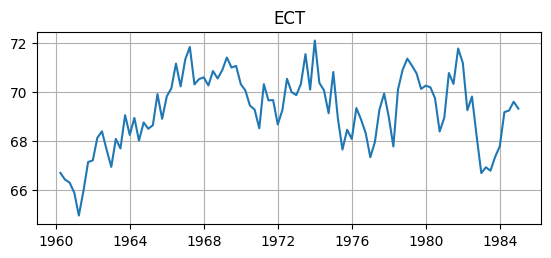

In [15]:
# Error Correction Term
ECT = sample_lev@results_vecm.beta
ECT.name = 'ECT'
# Plot data
fig, ax = plt.subplots(figsize=(6.5,2.5))
ax.plot(ECT); ax.grid(); ax.set_title(ECT.name);

In [16]:
# Unit Root Test   
test = adf_test(ECT,'c')
display(test)

ECT
Test Statistic  -3.330790
p-value          0.013557
# of Lags       11.000000
# of Obs        88.000000

Result: reject that the ECT has a unit root and conclude that it is probably stationary, as desired.

### Impulse Response Functions

- The estimated VECM cannot be used to compute IRFs
- IRFs are only defined for a VAR with stationary time series or a VAR with cointegrated time series in levels (e.g., Christiano et al., 2005)
- Instead we would estimate a reduced form VAR($p$) separately to compute IRFs, where $p$ comes from the selected lag order from the VECM estimation
- Then we can ask the question, how much does an increase in income change consumption and for how long?
- Since both GDP and consumption are both clearly endogenous to many other things in the macroeconomy, it doesn't make sense to use a Cholesky decomposition (e.g., orthogonalization) to estimate shocks.

In [17]:
# VAR model
from statsmodels.tsa.api import VAR
# make the VAR model
model_var = VAR(sample_lev)
# Estimate VAR(p)
results_var = model_var.fit(model_vecm.k_ar_diff + 1)
# Assign impulse response functions (IRFs)
irf = results_var.irf(20)

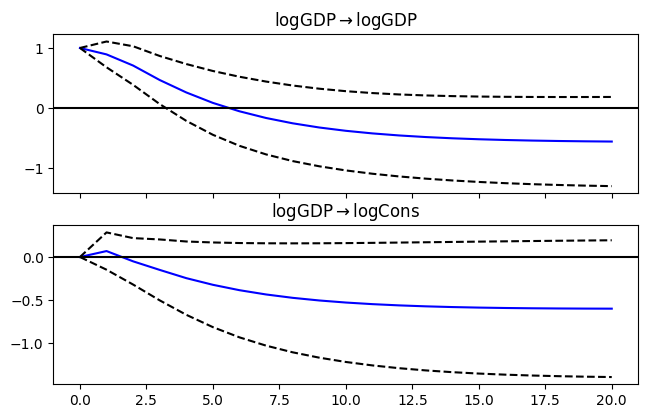

In [18]:
# Plot IRFs
fig = irf.plot(orth=False,impulse='logGDP',figsize=(6.5,4));
fig.suptitle(" ");

## Forecasting

- With the estimated VAR, forecasts can also be made
- Want to compare forecasts to actual data
- This may not be a great example because the 1980s is still relative volatile

In [19]:
# Lag order and end of sample
p = results_var.k_ar
last_obs = sample_lev.values[-p:] 
# Forecast 6 quarters ahead
h = 6;
forecast = results_var.forecast(y=last_obs, steps=h)
forecast_df = pd.DataFrame(forecast, columns=sample_lev.columns)
dates = pd.date_range(start='03-31-1985', periods=h, freq='QE')
forecast_df.index = dates  # Assign to index
# Actual Data
start_date = pd.Timestamp('12-31-1984')-pd.DateOffset(months=3*p)
end_date = pd.Timestamp('12-31-1984')+pd.DateOffset(months=3*h)
print(f'start date = {start_date}, end date = {end_date}')
sample_forecast = data[start_date:end_date]

start date = 1984-06-30 00:00:00, end date = 1986-06-30 00:00:00


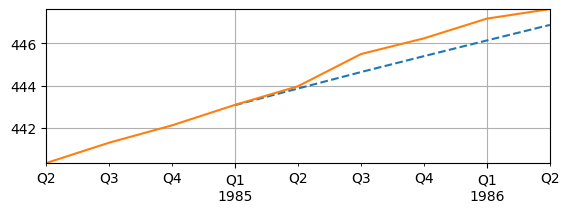

In [20]:
fig, ax = plt.subplots(figsize=(6.5,2))
forecast_df['logGDP'].plot(ax=ax, linestyle='--')
sample_forecast['logGDP'].plot(ax=ax, linestyle='-')
ax.grid(); ax.autoscale(tight=True); 

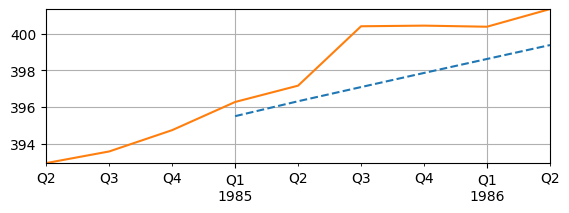

In [21]:
fig, ax = plt.subplots(figsize=(6.5,2))
forecast_df['logCons'].plot(ax=ax, linestyle='--')
sample_forecast['logCons'].plot(ax=ax, linestyle='-')
ax.grid(); ax.autoscale(tight=True); 